# Import Library


In [1]:
import sys
sys.path.append("C:/Users/isxzl/OneDrive/Code/SkyShrink")

In [2]:
from skyshrink.packarray import Packarray
from skyshrink.compressor import FPZip
from numcodecs import LZ4,Blosc,ZFPY,Zlib
from skyshrink.evaluation import compare_accuracy,compare_meta,visualize_spatial_accuracy,compare_attribute,plot_compression_ratios

In [3]:
from importlib.metadata import PackageNotFoundError, version
tuple(map(int, version("zfpy").split(".")))

(1, 0, 0)

# Initialization with Dataset and Methods

In [4]:
# original_path="C:\Datasets\Compression\KAUST_wind_preprocessed.nc"
# zip_dir="C:\Datasets\Compression\jpeg2000\KAUST_wind_preprocessed.nc"
# unzip_path="C:\Datasets\Compression\jpeg2000\KAUST_wind_preprocessed.nc" 
# /store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-TKE-IOP1 

file_name="wrfout_d04_2022-04-05_16:20:00"
save_dir="/afs/crc.nd.edu/user/z/zliang7/Dataset/"
file_dir="/store01/pcrippa/ajanisz2/WRF-ERA5-SRTM-TKE-IOP1/"
zip_dir=save_dir+file_name
unzip_path=save_dir+file_name
original_path=save_dir+"d04_batch.nc"

In [8]:
#pds1=Packarray(original_path=original_path)


In [9]:
# pds6=Packarray(original_path=original_path)
# pds6.compress({"HGT": {'compressor': ZFPY(mode=4,tolerance=0.001)},
#                "U10":{'compressor': Blosc(precision=20)},
#                "V10":{'compressor': LZ4()}})
# pds6.decompress()

pds1=Packarray(original_path=original_path)
pds1.compress(Zlib())
pds1.decompress()

pds2=Packarray(original_path=original_path)
pds2.compress(LZ4())
pds2.decompress()

pds3=Packarray(original_path=original_path)
pds3.compress(Blosc(cname='zlib')) #, clevel=9
pds3.decompress()

# pds4=Packarray(workspace_name="FPZip",original_path=original_path)
# pds4.compress(FPZip(precision=10))
# pds4.decompress() 

pds5=Packarray(workspace_name="ZFPY_12",original_path=original_path)
pds5.compress(ZFPY(mode=3,precision=12))
pds5.decompress()

pds6=Packarray(workspace_name="ZFPY_24",original_path=original_path)
pds6.compress(ZFPY(mode=3,precision=24))
pds6.decompress()

pds8=Packarray(workspace_name="FPZip_12",original_path=original_path)
pds8.compress(FPZip(precision=12))
pds8.decompress()

pds9=Packarray(workspace_name="FPZip_24",original_path=original_path)
pds9.compress(FPZip(precision=24))
pds9.decompress()



[Skyshrink:zlib] Start Compress to .../Dataset/zlib/d04_batch_zipped
[Skyshrink:zlib] Unzipping to ...set/zlib/d04_batch_unzipped.nc
[Skyshrink:lz4] Start Compress to ...7/Dataset/lz4/d04_batch_zipped
[Skyshrink:lz4] Unzipping to ...aset/lz4/d04_batch_unzipped.nc
[Skyshrink:blosc] Start Compress to ...Dataset/blosc/d04_batch_zipped
[Skyshrink:blosc] Unzipping to ...et/blosc/d04_batch_unzipped.nc
[Skyshrink:ZFPY_12] Start Compress to ...taset/ZFPY_12/d04_batch_zipped
[Skyshrink:ZFPY_12] Unzipping to .../ZFPY_12/d04_batch_unzipped.nc
[Skyshrink:ZFPY_24] Start Compress to ...taset/ZFPY_24/d04_batch_zipped
[Skyshrink:ZFPY_24] Unzipping to .../ZFPY_24/d04_batch_unzipped.nc
[Skyshrink:FPZip_12] Start Compress to ...aset/FPZip_12/d04_batch_zipped
[Skyshrink:FPZip_12] Unzipping to ...FPZip_12/d04_batch_unzipped.nc
[Skyshrink:FPZip_24] Start Compress to ...aset/FPZip_24/d04_batch_zipped
[Skyshrink:FPZip_24] Unzipping to ...FPZip_24/d04_batch_unzipped.nc


# Analysis

## 1. Comparision of Accuracy

In [7]:
df=compare_accuracy([pds5,pds6,pds8,pds9]).groupby(['var','workspace_name']).sum()
df.to_csv("Acc.csv")

Evaluate Meta: 100%|█████████████████████████████████████████████████████████████████████| 4/4 [00:37<00:00,  9.27s/it]


## 2. Comparision of Efficiency

In [7]:
df=compare_meta([pds1, pds2,pds3,pds6,pds9]).groupby(['var','method']).sum()
df.to_csv("efficiency.csv")

Evaluate Meta: 100%|███████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5008.72it/s]
C:\Users\isxzl\OneDrive\Code\SkyShrink\skyshrink\utils.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_df = df.applymap(format_cell)


## 3. Robustness under Parameters

In [8]:
from tqdm import tqdm
import zfpy

pds_list=[]
for level in tqdm(range(10,25)):
    pds=Packarray(workspace_name="FPZip_"+str(level),original_path=original_path,verbose=0)
    pds.compress(FPZip(precision=level))
    pds.decompress() 
    pds_list.append(pds)
    pds=Packarray(workspace_name="ZFPY"+str(level),original_path=original_path,verbose=0)
    pds.compress(ZFPY(mode=zfpy.mode_fixed_precision,precision=level))
    pds.decompress()
    pds_list.append(pds)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [02:15<00:00,  9.00s/it]


Evaluate Meta: 100%|█████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 3981.93it/s]


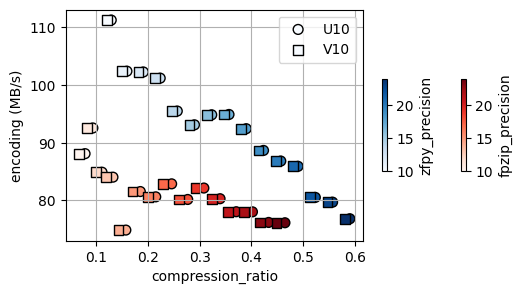

In [20]:
# Example usage:
df=compare_attribute(pds_list,attr_list=["method","precision","compression_ratio","encoding_speed"],glob=False)
method_list = ["fpzip", "zfpy"]
var_list = ["U10", "V10"]
x = "compression_ratio"
y = "encoding (MB/s)"
level="precision"
plot_compression_ratios(df, method_list, var_list, x, y,level) #,x_lim=[0.95,0.7]

In [13]:
df

,method,var,workspace_name,precision,compression_ratio,encoding (MB/s),decoding (MB/s)
0,fpzip,U10,FPZip_10,10,0.078729,124.753536,133.886692
1,fpzip,V10,FPZip_10,10,0.067643,124.753536,133.886692
2,fpzip,HGT,FPZip_10,10,0.000143,124.753536,133.886692
3,zfpy,U10,ZFPY10,10,0.129271,147.489505,299.099698
4,zfpy,V10,ZFPY10,10,0.121063,147.489505,299.099698
...,...,...,...,...,...,...,...
85,fpzip,V10,FPZip_24,24,0.448292,82.526953,93.424104
86,fpzip,HGT,FPZip_24,24,0.005907,82.526953,93.424104
87,zfpy,U10,ZFPY24,24,0.589905,89.809076,210.373613
88,zfpy,V10,ZFPY24,24,0.580168,89.809076,210.373613


Evaluate Meta: 100%|█████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 5009.32it/s]


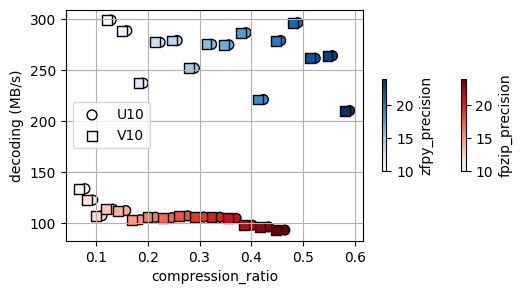

In [12]:
# Example usage:
df=compare_attribute(pds_list,attr_list=["method","precision","compression_ratio","encoding_speed","decoding_speed"],glob=False)
method_list = ["fpzip", "zfpy"]
var_list = ["U10", "V10"]
x = "compression_ratio"
y = "decoding (MB/s)"
level="precision"
plot_compression_ratios(df, method_list, var_list, x, y,level) #,x_lim=[0.95,0.7]

### Legacy

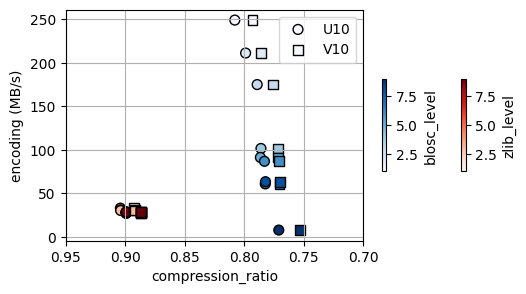

In [50]:
# from tqdm import tqdm
# pds_list=[]
# for level in tqdm(range(1,10)):
#     pds1=Packarray(workspace_name="Zlib_"+str(level),original_path=original_path,verbose=0)
#     pds1.compress(Zlib(level=level))
#     pds1.decompress()
#     pds_list.append(pds1)
#     pds3=Packarray(workspace_name="Blosc_"+str(level),original_path=original_path,verbose=0)
#     pds3.compress(Blosc(cname='zstd', clevel=level))
#     pds3.decompress()
#     pds_list.append(pds3)

# df=compare_attribute(pds_list,attr_list=["method","level","compression_ratio","encoding_speed"],glob=False)
# # Example usage:
# method_list = ["zlib", "blosc"]
# var_list = ["U10", "V10"]
# x = "compression_ratio"
# y = "encoding (MB/s)"
# level="level"
# plot_compression_ratios(df, method_list, var_list, x, y,level,x_lim=[0.95,0.7])


## 3. Accuracy Distribution over Space

In [22]:
pds1=Packarray(original_path=original_path)
pds1.compress(Zlib())
pds1.decompress()

pds6=Packarray(workspace_name="ZFPY_24",original_path=original_path)
pds6.compress(ZFPY(mode=3,precision=24))
pds6.decompress()

pds9=Packarray(workspace_name="FPZip_24",original_path=original_path)
pds9.compress(FPZip(precision=24))
pds9.decompress()


[Skyshrink:zlib] Start Overwrite to ...KAUST_wind_preprocessed_zipped
[Skyshrink:zlib] Unzipping overwrite to ..._wind_preprocessed_unzipped.nc
[Skyshrink:ZFPY_24] Start Overwrite to ...KAUST_wind_preprocessed_zipped
[Skyshrink:ZFPY_24] Unzipping overwrite to ..._wind_preprocessed_unzipped.nc
[Skyshrink:FPZip_24] Start Overwrite to ...KAUST_wind_preprocessed_zipped
[Skyshrink:FPZip_24] Unzipping overwrite to ..._wind_preprocessed_unzipped.nc


2it [00:00,  3.01it/s]


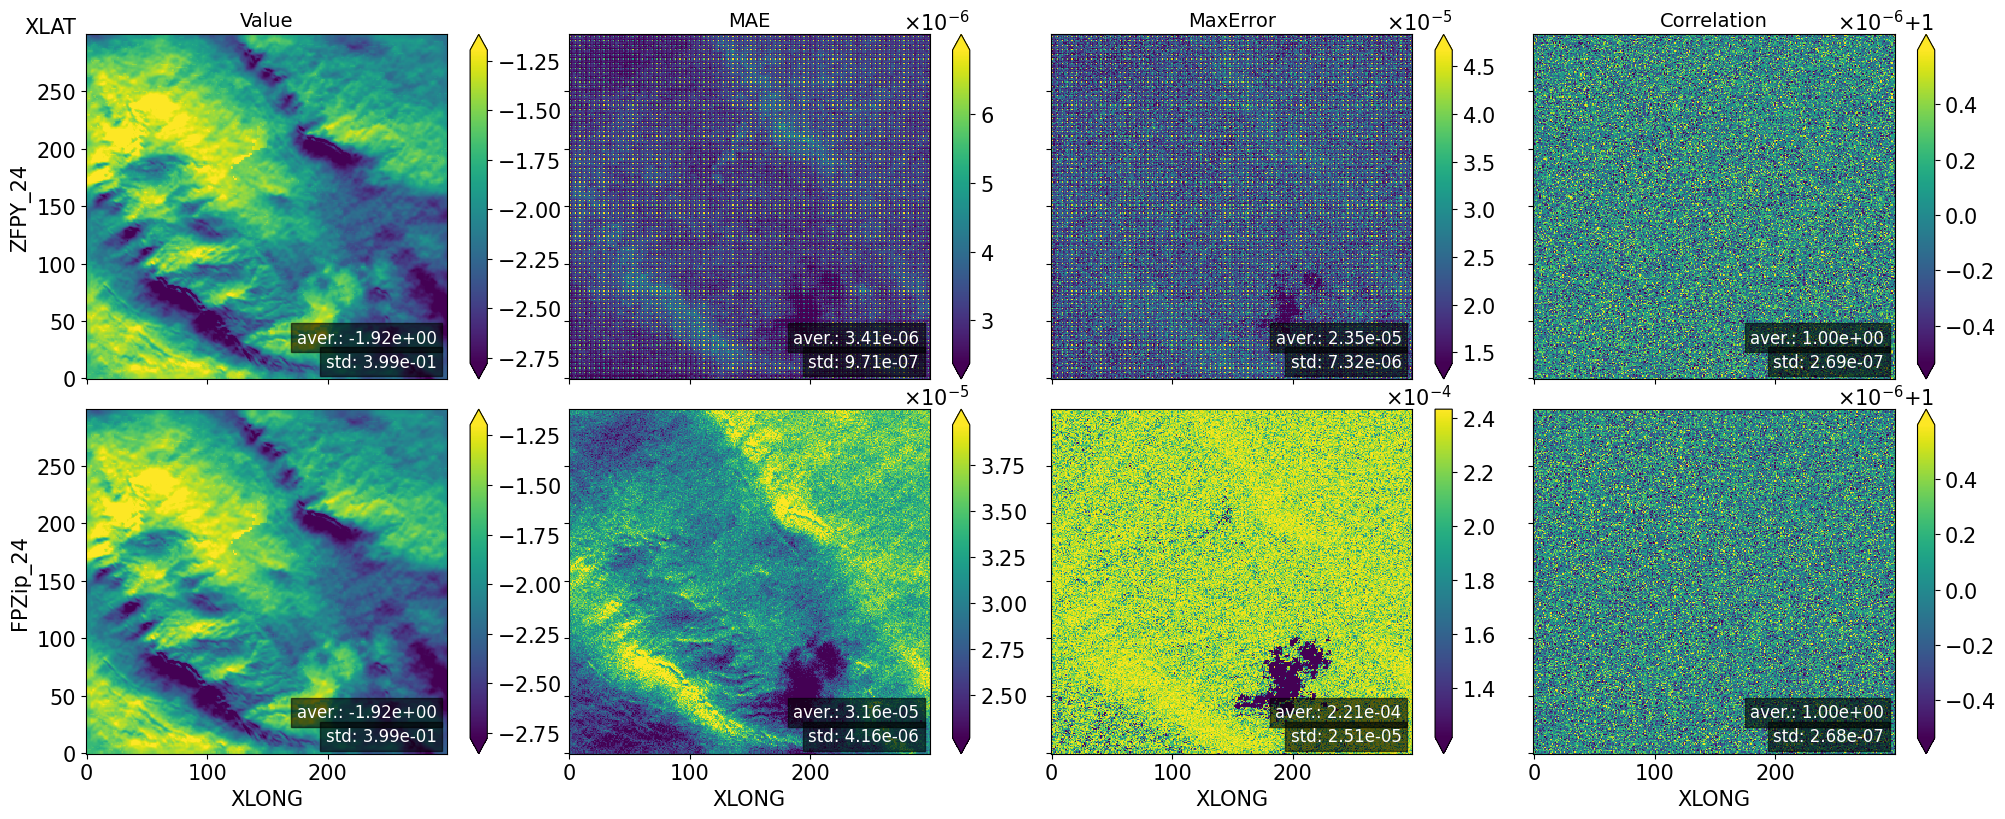

In [74]:


visualize_spatial_accuracy([ pds6, pds9], ["V10"])


## 3. Accuracy Distribution over Time

In [75]:
from tqdm import tqdm
import zfpy
from skyshrink.evaluation import time_series_accuracy,visualize_time_series

pds_list=[]
for level in tqdm([8,16, 24]):
    pds=Packarray(workspace_name="ZFPY"+str(level),original_path=original_path,verbose=0)
    pds.compress(ZFPY(mode=3,precision=level))
    pds.decompress()
    pds_list.append(pds)
    
    pds=Packarray(workspace_name="FPZip"+str(level),original_path=original_path,verbose=0)
    pds.compress(FPZip(precision=level))
    pds.decompress()
    pds_list.append(pds)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:35<00:00, 11.74s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.36s/it]


In [85]:

import pandas as pd
from tqdm import tqdm
import numpy as np
def time_series_accuracy(pds_list, legend_str):
    # Get the variable list from the first element in the list
    var_list = pds_list[0].glob["var_list"]
    global_df = pd.DataFrame()  # Initialize a global DataFrame to concatenate results
    ds_org=pds_list[0].xarray
    
    for pds in tqdm(pds_list):
        pds.sanity_check()  # Ensure data integrity
        ds = pds.xarray_encoded
        for var in var_list:
            ds_var = ds[var]
            legend_value = getattr(pds, var)[legend_str]
    
            # Calculate mean and standard deviation along the specified dimensions
            mean_ds = ds_var.mean(dim=["south_north", "west_east"])
            std_ds = ds_var.std(dim=["south_north", "west_east"])
            unit_df = ds_var.sel(south_north=160,west_east=160)
            mae_df = np.abs(ds_var-ds_org[var]).mean(dim=["south_north", "west_east"])
            
            # Convert to pandas DataFrame
            mean_df = mean_ds.to_dataframe(name='mean')
            std_df = std_ds.to_dataframe(name='std')
            unit_df = unit_df.to_dataframe(name='cell')  
            mae_df=mae_df.to_dataframe(name='mae')  
            
            # Concatenate mean and std DataFrames
            result_df = pd.concat([mean_df, std_df,unit_df,mae_df], axis=1)
            
            result_df['variable'] = var
            result_df[legend_str] = legend_value
            result_df['method'] = getattr(pds, var).get("method", "Unknown Method")
            # Append to global DataFrame
            global_df = pd.concat([global_df, result_df])
    return global_df
    
global_df

,mean,std,XLAT,XLONG,cell,mae,variable,precision,name
XTIME,,,,,,,,,
2016-07-22 00:00:00,0.905702,1.672111,25.051323,46.549164,2.734375,0.063105,U10,8,zfpy
2016-07-22 01:00:00,1.301076,1.058340,25.051323,46.549164,1.515625,0.080492,U10,8,zfpy
2016-07-22 02:00:00,1.807407,1.025118,25.051323,46.549164,1.921875,0.059971,U10,8,zfpy
2016-07-22 03:00:00,1.895097,1.005374,25.051323,46.549164,1.703125,0.069059,U10,8,zfpy
2016-07-22 04:00:00,2.211180,1.077162,25.051323,46.549164,2.593750,0.159629,U10,8,zfpy
...,...,...,...,...,...,...,...,...,...
2016-07-31 20:00:00,679.448547,86.079414,25.051323,46.549164,727.546875,0.007784,HGT,24,fpzip
2016-07-31 21:00:00,679.448547,86.079414,25.051323,46.549164,727.546875,0.007784,HGT,24,fpzip
2016-07-31 22:00:00,679.448547,86.079414,25.051323,46.549164,727.546875,0.007784,HGT,24,fpzip


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.37s/it]


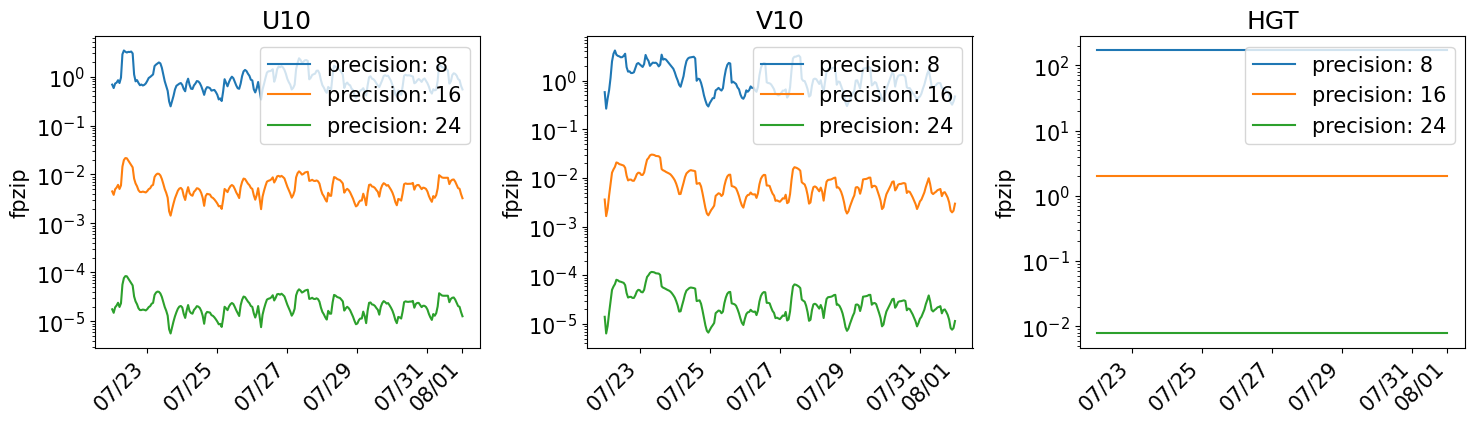

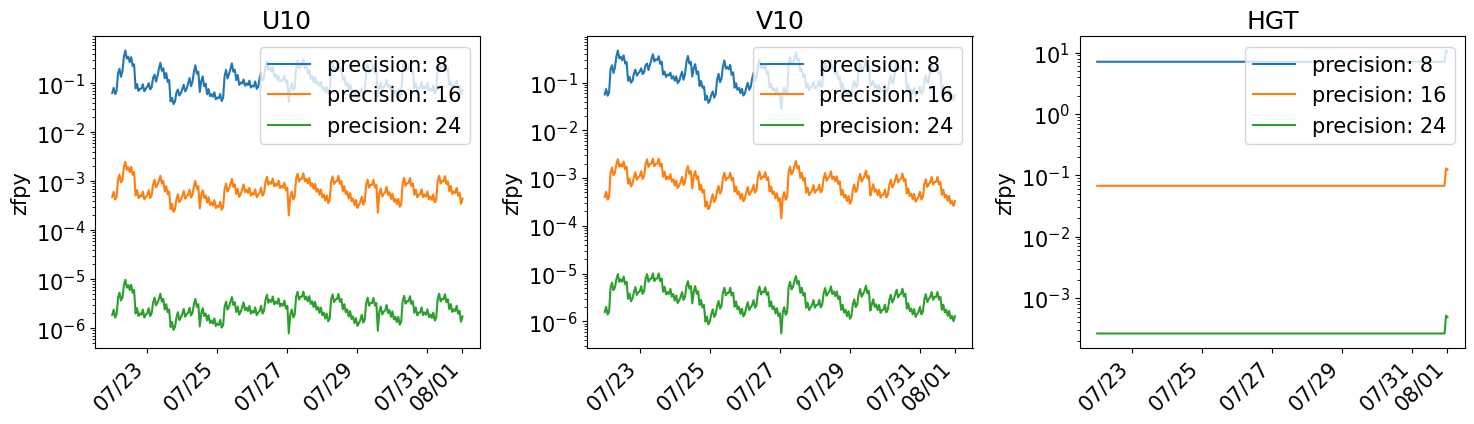

In [94]:
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

def visualize_time_series(global_df, y_str="mean", legend="tolerance", fontsize=15):
    # Update global font size
    plt.rcParams.update({'font.size': fontsize})
    
    # Group the DataFrame by the "method" column
    method_groups = global_df.groupby("method")
    num_methods = len(method_groups)
    
    # Determine the number of columns needed for the subplots
    cols = 3
    
    # Iterate over each method group and plot in separate rows
    for method_idx, (method_name, df_method) in enumerate(method_groups):
        var_list = df_method["variable"].unique()
        num_vars = len(var_list)
        rows = math.ceil(num_vars / cols)
        
        # Create a figure with GridSpec
        fig = plt.figure(figsize=(15, 4.5 * rows))
        gs = gridspec.GridSpec(rows, cols, figure=fig)
        
        for idx, var in enumerate(var_list):
            df_var = df_method[df_method["variable"] == var]
            
            # Define the position of the subplot in the grid
            ax = fig.add_subplot(gs[idx // cols, idx % cols], sharex=None if idx // cols == 0 else ax)
            
            for legend_val in df_var[legend].unique():
                df_legend = df_var[df_var[legend] == legend_val]
                df_legend = df_legend.sort_index()  # Ensure the time series is sorted by the index
                ax.plot(df_legend.index, df_legend[y_str], label=f'{legend}: {legend_val}')
            
            ax.set_title(f'{var}')
            ax.set_ylabel(f'{method_name}')
            ax.set_yscale('log')  # Set y-axis to logarithmic scale
            ax.legend()
            
            # Remove x-axis labels for all but the last row
            if idx // cols != rows - 1:
                plt.setp(ax.get_xticklabels(), visible=False)
            else:
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

        # Remove empty subplots
        for i in range(num_vars, rows * cols):
            fig.delaxes(fig.axes[i])

        # Adaptive adjustment of time labels
        fig.autofmt_xdate(rotation=45)
        
        # Adjust layout for better readability
        plt.tight_layout()
        plt.show()

# Example usage
global_df = time_series_accuracy(pds_list, "precision")
visualize_time_series(global_df, y_str="mae", legend="precision")


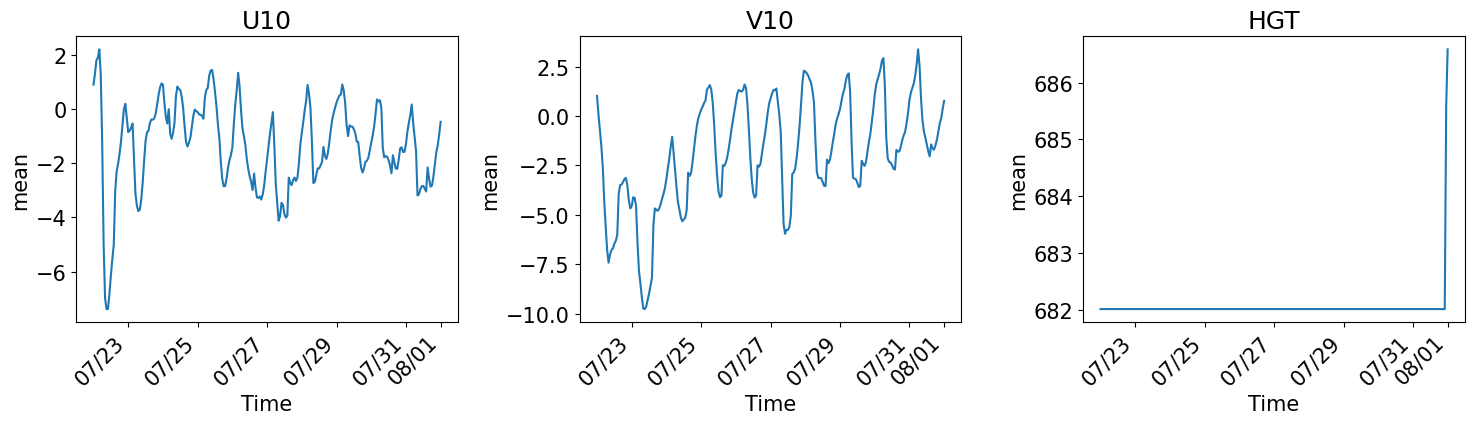

In [16]:
import matplotlib.pyplot as plt
import math
import matplotlib.dates as mdates
def visualize_time_series(global_df, y_str="mean", legend="tolerance", fontsize=15):
    # Update global font size
    plt.rcParams.update({'font.size': fontsize})
    
    # Extract unique variables from the DataFrame
    var_list = global_df["variable"].unique()
    num_vars = len(var_list)
    
    # Determine the number of rows and columns needed for the subplots
    cols = 3
    rows = math.ceil(num_vars / cols)
    
    # Create a grid for the subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 4.5 * rows), squeeze=False)
    
    for idx, var in enumerate(var_list):
        df_var = global_df[global_df["variable"] == var]
        
        # Plotting in the appropriate subplot
        ax = axes[idx // cols, idx % cols]
        for legend_val in df_var[legend].unique():
            df_legend = df_var[df_var[legend] == legend_val]
            df_legend = df_legend.sort_index()  # Ensure the time series is sorted by the index
            ax.plot(df_legend.index, df_legend[y_str], label=f'{legend}: {legend_val}')
        
        ax.set_title(f'{var}')
        ax.set_xlabel('Time')
        ax.set_ylabel(y_str)
        #ax.set_yscale('log')  # Set y-axis to logarithmic scale
        #ax.legend()
        
        # Adaptive adjustment of time labels
        fig.autofmt_xdate(rotation=45)
        # Set x-axis to display dates in a monthly format
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        
    # Remove empty subplots
    for i in range(num_vars, rows * cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout for better readability
    plt.tight_layout()
    plt.show()
    
    
visualize_time_series(global_df[global_df["precision"]==8], y_str="mean", legend="precision")

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]


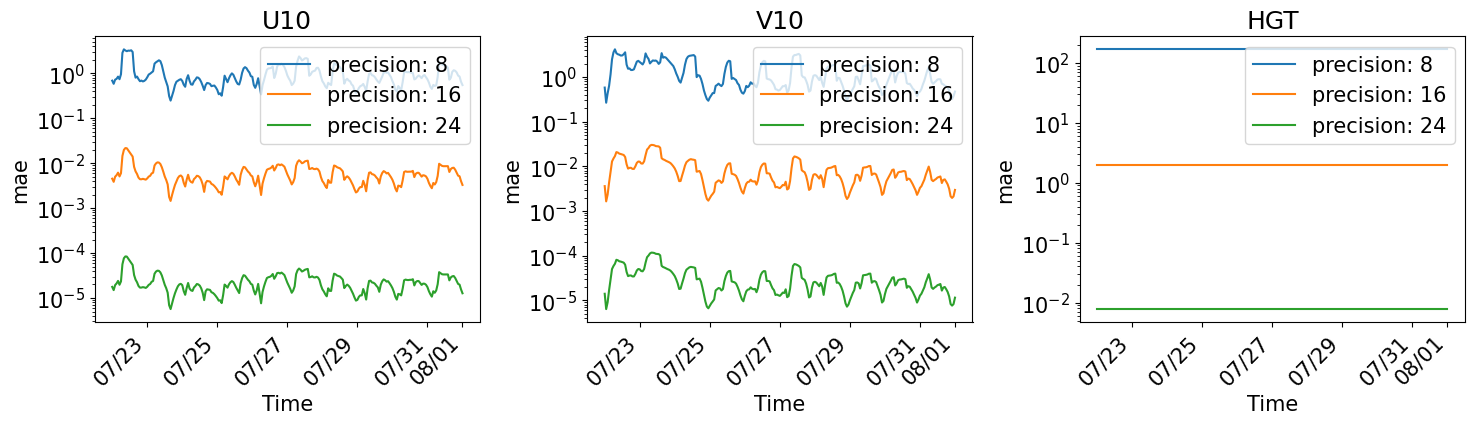